### 거래금액(만원)/전용면적(㎡) -> 통일

In [23]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작동되록 하는 설정

In [25]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [26]:
#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 7 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

### read_csv 하는데 필요한 파일 목록 (1)
- ./fin_data/서울시_의료기관_구_별_합계(2017)_최종_종합병원_수_포함.csv
- ./fin_data/서울시_의료기관_구_별_합계(2018)_최종_종합병원_수_포함.csv
- ./fin_data/서울시_의료기관_구_별_합계(2019)_최종_종합병원_수_포함.csv
- ./fin_data/서울시_의료기관_구_별_합계(2020)_최종_종합병원_수_포함.csv

In [27]:
df_medical_2017 = pd.read_csv("./fin_data/서울시_의료기관_구_별_합계(2017)_최종_종합병원_수_포함.csv",thousands = ',')
df_medical_2018 = pd.read_csv("./fin_data/서울시_의료기관_구_별_합계(2018)_최종_종합병원_수_포함.csv",thousands = ',')
df_medical_2019 = pd.read_csv("./fin_data/서울시_의료기관_구_별_합계(2019)_최종_종합병원_수_포함.csv",thousands = ',')
df_medical_2020 = pd.read_csv("./fin_data/서울시_의료기관_구_별_합계(2020)_최종_종합병원_수_포함.csv",thousands = ',')

In [28]:
apart_17= pd.read_csv("./data/2017년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_18= pd.read_csv("./data/2018년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_19= pd.read_csv("./data/2019년도_서울시_아파트_평균금액.csv",thousands = ',')
apart_20= pd.read_csv("./data/2020년도_서울시_아파트_평균금액.csv",thousands = ',')

In [29]:
df_medical_2017.head(2)
df_medical_2018.head(2)
df_medical_2019.head(2)
df_medical_2020.head(2)

,기간,자치구,의료기관_총_합계,종합병원
0,2017,강남구,2559,4
1,2017,강동구,761,3


,기간,자치구,의료기관_총_합계,종합병원
0,2018,강남구,2594,4
1,2018,강동구,771,3


,기간,자치구,의료기관_총_합계,종합병원
0,2019,강남구,2643,4
1,2019,강동구,789,3


,기간,자치구,의료기관_총_합계,종합병원
0,2020,강남구,2693,3
1,2020,강동구,823,3


## 2017 ~ 2020년 구별 부동산 ㎡당 가격과 범죄건수와의 상관계수 파악

### 불러온 각각의 데이터들을 array로 만들기 (각 구별 아파트 매매 평균 가격, 각 구별 의료기관)

#### 의료기관 총 합계 (종합병원 , 병원, 의원 , 부속병의원, 요양병원, 노인전문병원 ,결핵병원, 정신병원, 치과병원, 치과의원, 한방병원, 한방의원, 조산원)

In [30]:
np_medical_sum_2017 = np.array(df_medical_2017['의료기관_총_합계'][:25])
np_medical_sum_2018 = np.array(df_medical_2018['의료기관_총_합계'][:25])
np_medical_sum_2019 = np.array(df_medical_2019['의료기관_총_합계'][:25])
np_medical_sum_2020 = np.array(df_medical_2020['의료기관_총_합계'][:25])

In [44]:
np_medical_sum_2017

array([2559,  761,  447,  777,  673,  543,  557,  330,  717,  367,  605,
        560,  717,  432, 1229,  432,  525, 1106,  621,  729,  298,  623,
        500,  543,  491], dtype=int64)

#### 종합병원

In [31]:
np_hospital_2017 = np.array(df_medical_2017['종합병원'][:25])
np_hospital_2018 = np.array(df_medical_2018['종합병원'][:25])
np_hospital_2019 = np.array(df_medical_2019['종합병원'][:25])
np_hospital_2020 = np.array(df_medical_2020['종합병원'][:25])

In [32]:
np_hospital_2017
np_hospital_2018
np_hospital_2019
np_hospital_2020

array([4, 3, 1, 3, 2, 2, 2, 1, 3, 1, 5, 2, 0, 2, 1, 1, 1, 2, 2, 7, 1, 1,
       4, 3, 3], dtype=int64)

array([4, 3, 1, 4, 2, 2, 2, 1, 3, 1, 5, 2, 0, 2, 1, 1, 1, 2, 2, 7, 1, 1,
       4, 3, 3], dtype=int64)

array([4, 3, 1, 4, 1, 2, 2, 1, 3, 1, 4, 2, 0, 2, 1, 1, 1, 2, 3, 7, 1, 2,
       4, 2, 3], dtype=int64)

array([3, 3, 1, 4, 1, 2, 2, 1, 3, 1, 4, 2, 0, 2, 1, 1, 1, 2, 3, 7, 1, 2,
       4, 2, 3], dtype=int64)

#### 아파트 거래금액(만원) / 전용면적(㎡)

In [33]:
np_price_2017 = np.array(apart_17['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2018 = np.array(apart_18['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2019 = np.array(apart_19['거래금액(만원)/전용면적(㎡)'][:25])
np_price_2020 = np.array(apart_20['거래금액(만원)/전용면적(㎡)'][:25])

### 상관계수
- 공분산의 단위는 직감적으로 이해하기 어려우므로, 단위에 의존하지 않는 상관을 나타내는 지표
- 시험 점수간의 공분산 (점수 X 점수), 키와 점수간의 공분산 (cm X 점수)
- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음



### 수식으로 계산
- 예시) -> np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))




- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

### 의료기관 총 합계와 아파트 매매 가격과의 상관관계 -> r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

In [34]:
# 의료기관 총 합계 

np.cov(np_price_2017,np_medical_sum_2017, ddof=0)[0,1] / (np.std(np_price_2017) * np.std(np_medical_sum_2017)) # 0.7680963622729982
np.cov(np_price_2018,np_medical_sum_2018, ddof=0)[0,1] / (np.std(np_price_2018) * np.std(np_medical_sum_2018)) # 0.7386597491188394
np.cov(np_price_2019,np_medical_sum_2019, ddof=0)[0,1] / (np.std(np_price_2019) * np.std(np_medical_sum_2019)) # 0.7270595935455445
np.cov(np_price_2020,np_medical_sum_2020, ddof=0)[0,1] / (np.std(np_price_2020) * np.std(np_medical_sum_2020)) # 0.6837879535288266

0.7680963622729982

0.7342140151825923

0.7208227580367933

0.6789063981178319

### 종합 병원 수와 아파트 매매 가격과의 상관관계

In [35]:
np.cov(np_price_2017,np_hospital_2017, ddof=0)[0,1] / (np.std(np_price_2017) * np.std(np_hospital_2017)) # 0.05206126240251986
np.cov(np_price_2018,np_hospital_2018, ddof=0)[0,1] / (np.std(np_price_2018) * np.std(np_hospital_2018)) # 0.0401107470992192
np.cov(np_price_2019,np_hospital_2019, ddof=0)[0,1] / (np.std(np_price_2019) * np.std(np_hospital_2019)) # 0.05454467905689073
np.cov(np_price_2020,np_hospital_2020, ddof=0)[0,1] / (np.std(np_price_2020) * np.std(np_hospital_2020)) # 0.053571158702848495

0.05206126240251986

0.0296466210514218

0.055295811933750015

-0.0422756091489914

## 산점도

In [36]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2017, np_medical_sum_2017, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2017.min(), np_price_2017.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2017년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

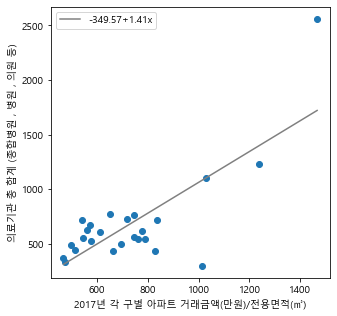

<Figure size 432x288 with 0 Axes>

In [37]:
## 2017년 부동산 금액과 의료기관 총 합계와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(np_price_2017, np_medical_sum_2017)
ax.set_xlabel('2017년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2017_부동산금액_의료기관_총 _합계.png')

In [38]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2018, np_medical_sum_2018, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2018.min(), np_price_2018.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2018년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

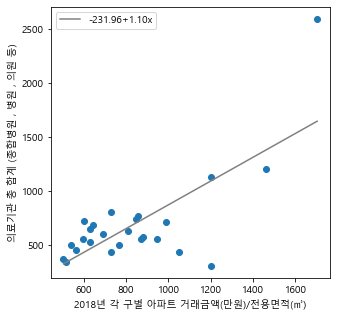

<Figure size 432x288 with 0 Axes>

In [39]:
## 2018년 부동산 금액과 범죄검수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(np_price_2018, np_medical_sum_2018)
ax.set_xlabel('2018년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2018_부동산금액_의료기관_총 _합계.png')

In [40]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2019, np_medical_sum_2019, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2019.min(), np_price_2019.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2019년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

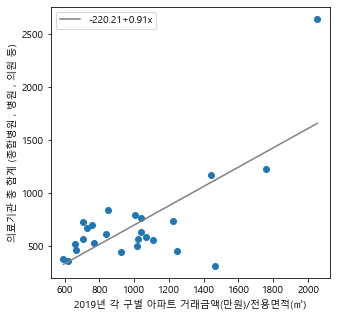

<Figure size 432x288 with 0 Axes>

In [41]:
## 2019년 부동산 금액과 범죄검수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(np_price_2019, np_medical_sum_2019)
ax.set_xlabel('2019년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2019_부동산금액_의료기관_총 _합계.png')

In [42]:
# 기울기와 절편
poly_fit = np.polyfit(np_price_2020, np_medical_sum_2020, 1)

poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x 좌표를 생성
xs = np.linspace(np_price_2020.min(), np_price_2020.max())

# xs에 대응하는 y좌표를 구한
ys = poly_1d(xs)

Text(0.5, 0, '2020년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')

Text(0, 0.5, '의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

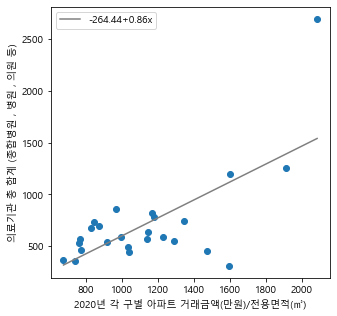

<Figure size 432x288 with 0 Axes>

In [43]:
## 2020년 부동산 금액과 범죄검수와의 산점도

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(np_price_2020, np_medical_sum_2020)
ax.set_xlabel('2020년 각 구별 아파트 거래금액(만원)/전용면적(㎡)')
ax.set_ylabel('의료기관 총 합계 (종합병원 , 병원 , 의원 등)')

ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

plt.savefig('./fin_data/2020_부동산금액_의료기관_총 _합계.png')